In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('train.xlsx')

In [2]:
# 한글폰트 적용
plt.rc('font', family='NanumGothicOTF') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothicOTF']


In [3]:
# 분석 차트 그리는 함수 목록

def show_pie_chart(df, col_name):
    colname_survived = survived_crosstab(df, col_name)
    pie_chart(colname_survived)
    return colname_survived

def survived_crosstab(df, col_name):
    '''col_name과 Survived간의 교차도표 생성'''
    feature_survived = pd.crosstab(df[col_name], df['우범여부'])
    feature_survived.columns = feature_survived.columns.map({0:"정상", 1:"우범"})
    return feature_survived

def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' 우범".format(index_name))

    plt.show()

In [4]:
df.sample(10)

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,...,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,검사결과코드,우범여부,핵심적발
8800,79442791,2020-01-28,40,FKMPG,BSDC1RA,NKY2GQ7,PR5UFJ,F,B,94,...,10,2010205,6115990000,CN,CN,FCN1,5.2,A,0,0
63586,82746740,2020-08-10,40,QUP4L,Z7JBZW0,NaN,NaN,C,B,11,...,10,2006103,6202120000,CN,CN,A,13.0,A,0,0
29928,73346467,2020-04-06,40,T7VQN,1EZ76ZC,E5A22BR,6TFEP5,D,B,91,...,40,1351002,8545909000,JP,JP,P3,0.0,A,0,0
57822,47528101,2020-07-20,40,Y671O,ZHSGXZE,YWF88IW,NaN,C,B,15,...,40,2010755,6505009090,CN,CN,FCN1,3.2,A,0,0
14148,25547606,2020-02-13,40,DYTEW,CUXVF8F,NaN,NaN,D,B,91,...,10,2006033,6403994000,ID,ID,FAS1,0.0,A,0,0
42391,67610147,2020-05-22,30,8BX8X,O5IKUKS,0TASM6G,NaN,B,B,15,...,40,2010025,6402999000,BR,BR,A,13.0,A,0,0
40945,77912195,2020-05-18,40,JQ752,4BHVJ6W,ERMBWEE,PR5UFJ,D,B,87,...,10,3077016,4016930000,NL,DE,A,8.0,A,0,0
2216,29048895,2020-01-08,40,VD3EK,69JMNDR,NaN,NaN,C,D,11,...,50,4077009,6307909000,TW,TW,A,10.0,A,0,0
57540,94894877,2020-07-19,20,7Q31W,FC92BCB,NaN,NaN,D,A,11,...,40,2011017,307432090,CN,CN,FCN1,14.0,A,0,0
71352,15050757,2020-09-10,20,0BW53,MF5VEJV,GEH5OKC,26O9QU,D,B,11,...,10,3078048,9404900000,CN,CN,FCN1,4.8,A,0,0


In [5]:

##부호, 코드 범주형으로 만들기
code=['통관지세관부호', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '반입보세구역부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드', '검사결과코드']

for var in code:
    df[var] = df[var].astype(object)

In [6]:
##휴일 칼럼 만들기
holiday=['2020-01-01', '2020-01-24', '2020-01-25','2020-01-26', '2020-01-27',
         '2020-03-01', '2020-04-15', '2020-04-30', '2020-05-01',
         '2020-05-05',
         '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30',
         '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25']

holiday=pd.to_datetime(holiday, format='%Y-%m-%d')
holist=[]

for var in df['신고일자']:
    if ((var.weekday())>4) or (var in holiday):
        holist.append("O")
    else:
        holist.append("X")
        
df["휴일여부"]=holist
df.sample(10)

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,...,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,검사결과코드,우범여부,핵심적발,휴일여부
9737,94124538,2020-01-30,20,PBFX4,ABX8IH8,NaN,NaN,F,B,11,...,4077106,7117199000,JP,JP,A,8.0,A,0,0,X
57035,70588597,2020-07-16,40,IM9CB,FQINV9K,MW8PLZN,NaN,D,B,15,...,2012014,8472909000,MY,MY,FAS1,0.0,J8,1,1,X
51067,69796519,2020-06-24,20,0QN4A,TANFZNA,W6JOYIU,NaN,C,B,15,...,3012240,2931390000,NL,DE,FEU1,0.0,A,0,0,X
41887,42800436,2020-05-21,20,JM4OV,OS7X5CZ,89WXEDL,NaN,B,B,94,...,4077010,8501101000,HK,HK,A,8.0,A,0,0,X
1224,45886029,2020-01-06,10,1WCZK,UQA7SFV,NaN,NaN,C,B,15,...,1602003,2104103000,TW,TW,A,18.0,A,0,0,X
20197,32310089,2020-03-03,16,5CQSJ,OKV4HOP,SLNJ3PO,PAVJZL,D,B,11,...,3311316,3304999000,TH,TH,C,6.5,A,0,0,X
575,69830634,2020-01-02,30,4U9GW,4GYR5KF,VQYFFAZ,6TFEP5,C,B,11,...,4077167,9201200000,CN,CN,A,8.0,A,0,0,X
20228,82081061,2020-03-03,40,LWA4Z,PQMGGRO,U2JGX6I,NaN,C,B,11,...,1606018,8205599000,HK,TW,A,8.0,A,0,0,X
43734,56452093,2020-05-27,40,CAG89,J124Q7Z,91PRFXR,718MAA,D,B,11,...,2012007,8529909990,CN,CN,CIT,0.0,A,0,0,X
60151,43569559,2020-07-28,40,YZAS8,U3PL9QO,A1GBIJ8,NaN,C,B,11,...,2077024,9503003990,JP,CN,C,0.0,G7,1,2,X


In [7]:
df['휴일여부'].value_counts()

X    72195
O     4642
Name: 휴일여부, dtype: int64

<ipython-input-3-ce1c551bc529>:26: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(prow, pcol, row+1)


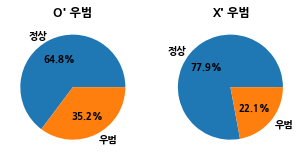

우범여부,정상,우범
휴일여부,,
O,3006,1636
X,56259,15936


In [8]:
c = show_pie_chart(df, '휴일여부')
c

In [5]:
discrete_columns = ['신고일자',  '통관지세관부호',
       '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', 
       '수입신고구분코드', '수입거래구분코드',
       '수입종류코드', '징수형태코드', 
       '운송수단유형코드', '반입보세구역부호', 
       'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드']

In [6]:
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율', '우범여부']

In [7]:
##one hot encoding
for var in discrete_columns:
    df[var] = df[var].astype(str)
    
for var in numeric_columns:
    df[var] = df[var].astype('int64')

df_numeric = df[numeric_columns]
df_onehot=df

##one hot encoding
from sklearn.preprocessing import  OneHotEncoder
xgbohe = OneHotEncoder(categories="auto", handle_unknown='ignore')
df_onehot = xgbohe.fit_transform(df_onehot[discrete_columns])
df_onehot = pd.DataFrame(df_onehot.toarray(), columns = xgbohe.get_feature_names(discrete_columns))
df_onehot = pd.concat([df_onehot, df_numeric], axis=1)